In [1]:
# ящик с усами или боксплот
import seaborn as sns

In [2]:
# загрузка датасета про чаевые
tips = sns.load_dataset(name='tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


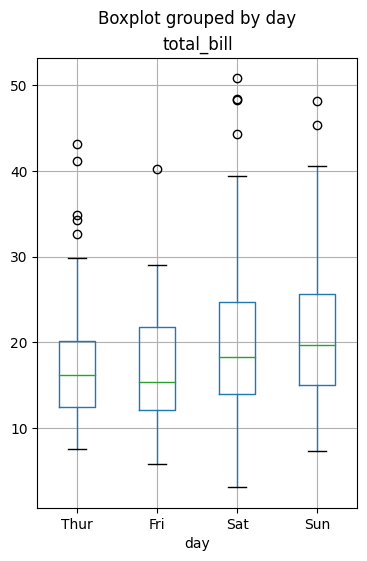

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(tips)
df.boxplot(column='total_bill', by="day", figsize=(4, 6))
plt.show()

<AxesSubplot: xlabel='day', ylabel='total_bill'>

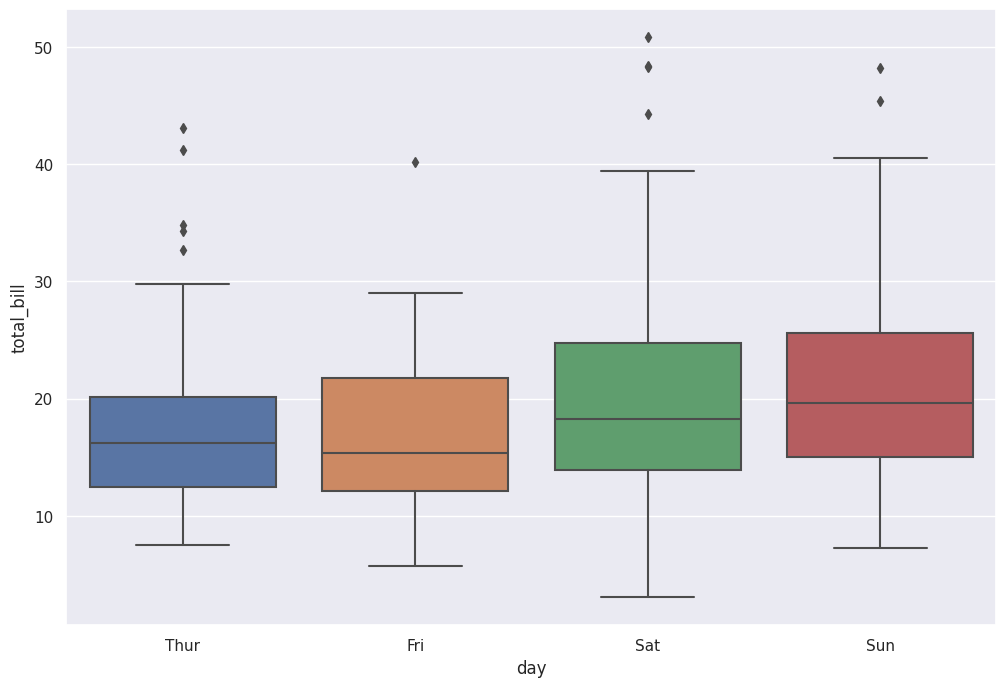

In [5]:
sns.set(rc={'figure.figsize': (12, 8)})
# зависимость чека от дня недели
sns.boxplot(x='day', y = 'total_bill', data=tips)

#### Перцентиль, Квантиль, Квартиль
- __Перцентиль__ от 0 до 100
- __Квартиль__ от 1 до 4: Q0 - Q0 Q1 Q2 Q3 Q4.
- __Квантиль__ - `диапазон` от любого значния до любого другого значения
- Пецентили и квартили - это виды квантилей.

___
- 0 перцентиль - 0 квантиль(Q0 минимум)
- 25 перцентиль - 1 квартиль (Q1)
- 50 перцентиль - 2 квартиль (Q2 медиана)
- 75 перцентиль - 3 квартиль (Q3)
- 100 перцентиль - 4 квартиль (Q4 максимум)

Боксплот строится на основаниии межквартильного метода
или по англ `IQR` - Interquantile Range

__IQR__ опредеделяет средние 50% данных или иначе тело данных
IQR = (Q3 - Q1)

In [6]:
Q3 = tips.total_bill.quantile(0.75)
Q1 = tips.total_bill.quantile(0.25)
IQR = Q3 - Q1
print(f"Q3 = {Q3:3.2f}")
print(f"Q2 or median = {tips.total_bill.quantile(0.5):3.2f}")
print(f"Q1 = {Q1:3.2f}")

# Выбросы не должны выходит за рамки [Q1 - 1.5 * IQR; Q3 + 1.5 * IQR]



Q3 = 24.13
Q2 or median = 17.80
Q1 = 13.35


In [7]:
# можно вместо quantile из Pandas использовать медод percentile из numpy
import numpy as np

q1 = np.percentile(a=tips.total_bill, q=25)
q2 = np.percentile(a=tips.total_bill, q=50)
q3 = np.percentile(a=tips.total_bill, q=75)
iqr = q3 - q1
print(f"q1 = {q1:3.2f}")
print(f"q2 = {q2:3.2f}")
print(f"q3 = {q3:3.2f}")
print(f"iqr = {iqr:3.2f}")

q1 = 13.35
q2 = 17.80
q3 = 24.13
iqr = 10.78


#### Поиск выбросов

In [8]:
# выбросы сверху
upper = tips[tips.total_bill >= (q3 + 1.5* iqr)]
upper

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


In [9]:
# выбросы снизу
lower = tips[tips.total_bill <= (q1 - 1.5 * iqr)]
lower.head()        # нет выбросов с нижей границы 

,total_bill,tip,sex,smoker,day,time,size


In [10]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


`Почему от выбросов надо избавлятся?`

Есть некое количество экстремальных значений, котоыре встречаются в наборе данных и которые могут влиять на такие значния, как медиана, среднее и давать нам их искаженную оценку.

Строя графики мы пытаемся понять какое количество значений в какой части у нас есть. 

Не всегда выбросы надо удалять. Бывают очень разряженные датасеты и избавление от выбросов приведет к удалению большого количества данных, которые для нас очень ценны. Иногда бывает что выбросы обрабатывают уменьшая их размер вычитая единое значение, или их обрабоатают в отдельном датасете. 

Если выбросов мало из можно оставить и рассмотреть их уже с точки зрения аналитики, а не статистики.

 

In [11]:
# Значния только в определенный день недели

tips[tips.day == 'Fri']['total_bill'].describe().T  # данные по общему чеку в пятницу

count    19.000000
mean     17.151579
std       8.302660
min       5.750000
25%      12.095000
50%      15.380000
75%      21.750000
max      40.170000
Name: total_bill, dtype: float64

In [12]:
tips[tips.day == 'Sat']['total_bill'].describe().T

count    87.000000
mean     20.441379
std       9.480419
min       3.070000
25%      13.905000
50%      18.240000
75%      24.740000
max      50.810000
Name: total_bill, dtype: float64

## Гистограмма


<AxesSubplot: >

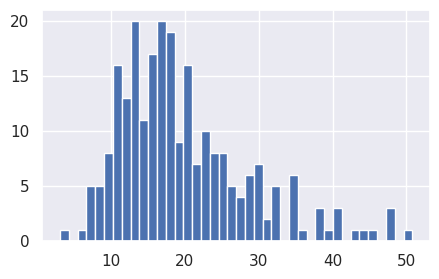

In [13]:
tips['total_bill'].hist(figsize=(5, 3), bins=40)

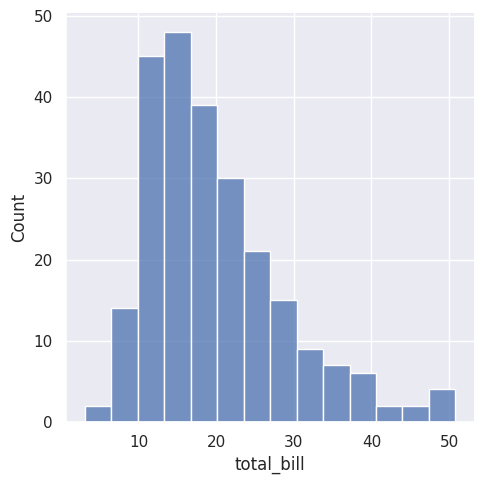

In [14]:
sns.displot(tips.total_bill);

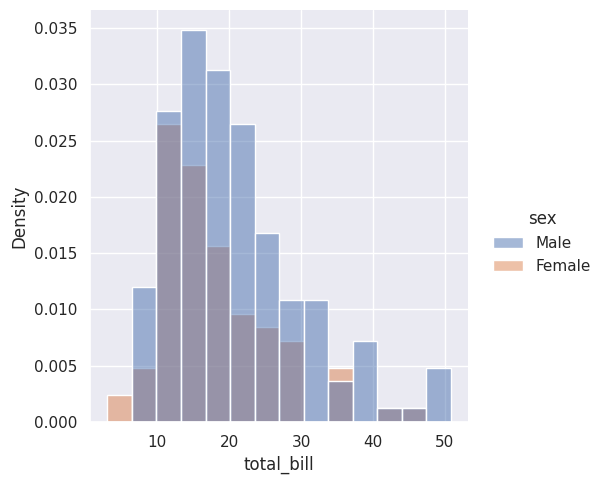

In [15]:
sns.displot(data=tips, x='total_bill', hue='sex', stat='density');
# аргумент stat помогает нам посмотреть на два варианта распределения
# распределение плотности и распределение веротяности
# при распределении плотности графики накладывабтся  друг на друга
# этот метод применяет норарование для всех данных, независимо от того, к какой катеогрии он относятся
# т.е. он буквально берет общий чек и по нему нормирует все показатели

#

```
Когда нормируем данные и пытаемся их сравнивать то важно нормировать их по группам, 
смотреть эту нормировку, а не от всего набора данных. 

Это позволит правильно сравнить между собой результаты.
```

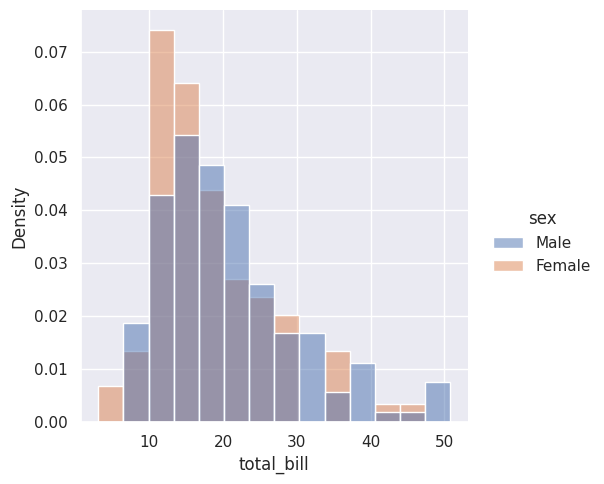

In [16]:
# но нас инетресует нормировка относительно групп, в которых находится мужской и женский чек

sns.displot(data=tips, x='total_bill', hue='sex', stat='density', common_norm=False);
# common_norm - общая нормализация данных, т.е. он нормирует данные внутри групп по каоторым мы их поделили

# теперь нормировка происходит по группам и мы можем сравнть как разнтся чеки по полу



In [17]:
# дискретные

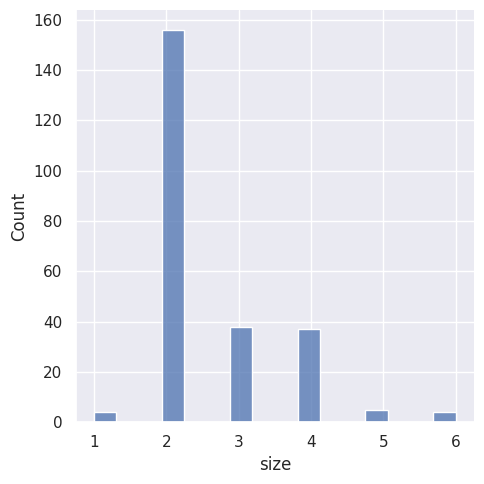

In [18]:
sns.displot(data=tips, x='size');   # ! некрасиво выглядит в случае дискретных величин

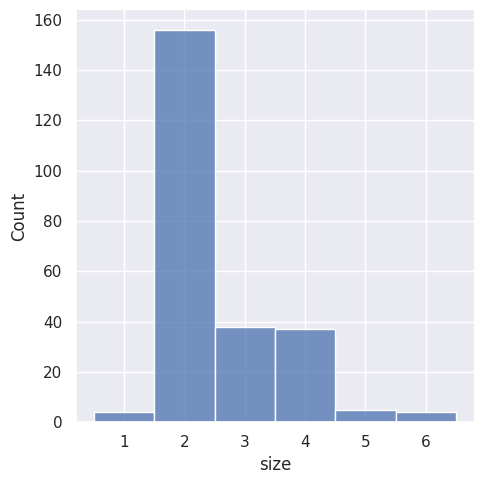

In [19]:
# сделать график именно дял дискретной величины
sns.displot(data=tips, x='size', discrete=True);

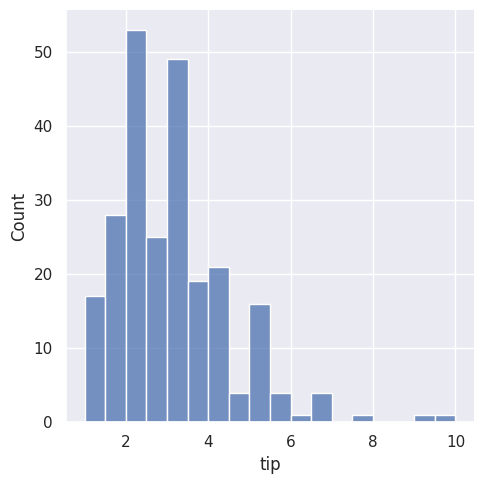

In [20]:
# график распределения непрерывной величины
sns.displot(data=tips, x='tip',);

<AxesSubplot: xlabel='size', ylabel='total_bill'>

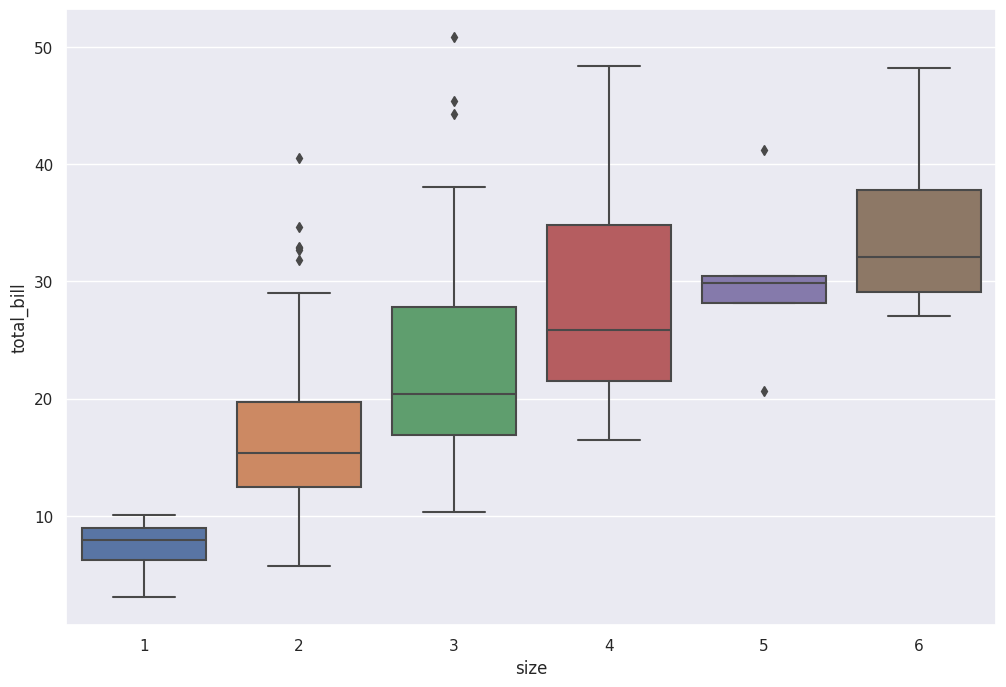

In [21]:
sns.boxplot(data=tips, x='size', y='total_bill')

#### Графики для чаевых

In [22]:
# Чтобы сгруппировать чаевые и посмотреть на их распределение в группах значений
# надо их округлить
# округление методом pandas
# указываем в каком столбце и до скольки мы хотим округлить после запятой
tips_rounded = tips.round({'tip': 0})
tips_rounded

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.0,Female,No,Sun,Dinner,2
1,10.34,2.0,Male,No,Sun,Dinner,3
2,21.01,4.0,Male,No,Sun,Dinner,3
3,23.68,3.0,Male,No,Sun,Dinner,2
4,24.59,4.0,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,6.0,Male,No,Sat,Dinner,3
240,27.18,2.0,Female,Yes,Sat,Dinner,2
241,22.67,2.0,Male,Yes,Sat,Dinner,2
242,17.82,2.0,Male,No,Sat,Dinner,2


In [23]:
# распределение значения tips по группам
tips_rounded.groupby(by='tip').count()

,total_bill,sex,smoker,day,time,size
tip,,,,,,
1.0,17,17,17,17,17,17
2.0,91,91,91,91,91,91
3.0,64,64,64,64,64,64
4.0,41,41,41,41,41,41
5.0,19,19,19,19,19,19
6.0,7,7,7,7,7,7
7.0,2,2,2,2,2,2
8.0,1,1,1,1,1,1
9.0,1,1,1,1,1,1


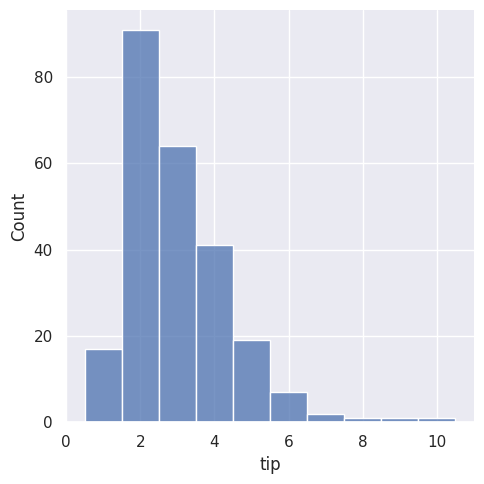

In [24]:
sns.displot(data=tips_rounded, x='tip', discrete=True)

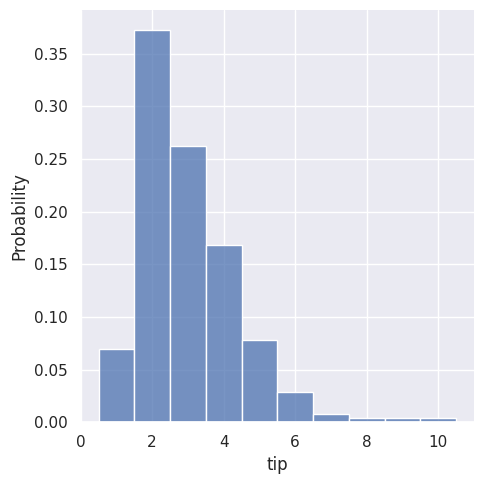

In [26]:
# вместо абсолютных значений вывести вероятность
sns.displot(data=tips_rounded, x='tip', stat='probability', discrete=True)

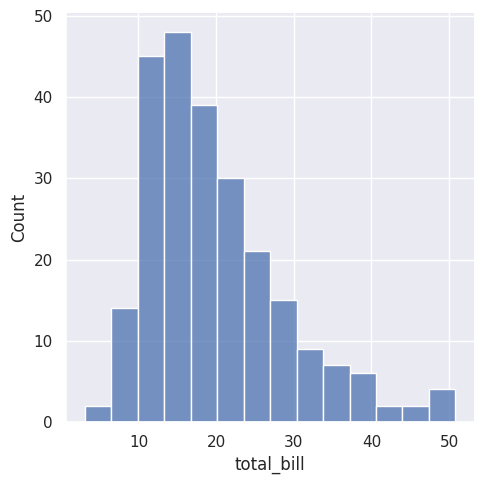

In [28]:
# frequency density
    

sns.displot(data=tips, x='total_bill')

In [29]:
# сортовка по указанному столбцу

# сортировка нужна чтобы узнать максимум, мимнимум и правильно распределеить весь надор по группам
tips.sort_values('total_bill', ascending=False)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3
...,...,...,...,...,...,...,...
149,7.51,2.00,Male,No,Thur,Lunch,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2


In [33]:
import numpy as np

conditions = [
    (tips.total_bill >= 3) & (tips.total_bill <= 19),
    (tips.total_bill > 19) & (tips.total_bill <=35),
    (tips.total_bill > 35) & (tips.total_bill <= 51)
]
choices = ['< 19', '19 - 35', '> 35']

# np.select вместо циклов или map
tips['tip-group'] = np.select(condlist=conditions, choicelist=choices, default='0')
tips

,total_bill,tip,sex,smoker,day,time,size,tip-group
0,16.99,1.01,Female,No,Sun,Dinner,2,< 19
1,10.34,1.66,Male,No,Sun,Dinner,3,< 19
2,21.01,3.50,Male,No,Sun,Dinner,3,19 - 35
3,23.68,3.31,Male,No,Sun,Dinner,2,19 - 35
4,24.59,3.61,Female,No,Sun,Dinner,4,19 - 35
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,19 - 35
240,27.18,2.00,Female,Yes,Sat,Dinner,2,19 - 35
241,22.67,2.00,Male,Yes,Sat,Dinner,2,19 - 35
242,17.82,1.75,Male,No,Sat,Dinner,2,< 19


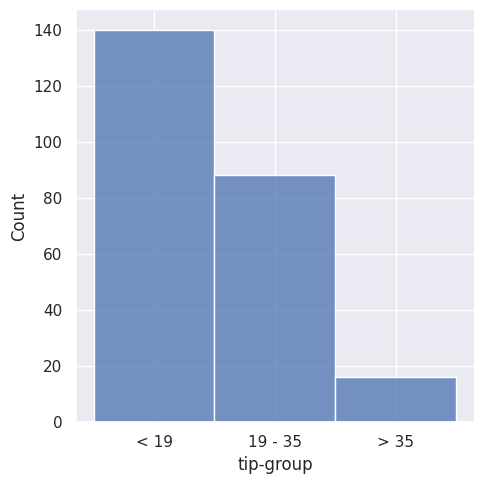

In [39]:
sns.displot(data=tips, x='tip-group', discrete=True); #, stat='probability');

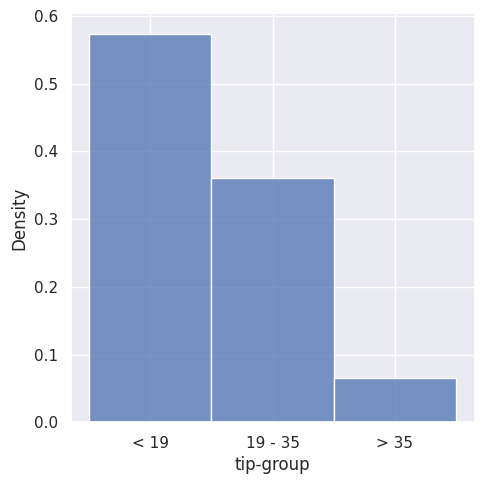

In [40]:
# вероятность получить тот или иной чек
# плотность вероятности получить тот или иной чек   
sns.displot(data=tips, x='tip-group', stat='density');

### Зачем округлять чаевые?
Есть два варианта работы с непрерывными данынми
- сделать их них катогариальные переменные, например путем округления
- разбить на группы при помощи условия (например numpy.select) и посмотреть плотность частоты по этим диапазонам

# Биноминальное распределение

P_n_k = C_n_k * $(p^n) * q**(n-k) = C_n_k * p**n * (1-p)**(n-k)


```math
\sqrt{3}
```